# Importing Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

# Data Handling

In [57]:
df = pd.read_csv('/Users/derek/Desktop/PyCharm./Unit_3_X_Project/xccelerate_p3/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
df.shape

(284807, 31)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [32]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Dataset Manipulation

In [21]:
df[df['Class'] == 1].count()

"""492 out of 284,807 transaction was marked as frauds"""

'492 out of 284,807 transaction was marked as frauds'

Class as pie chart:


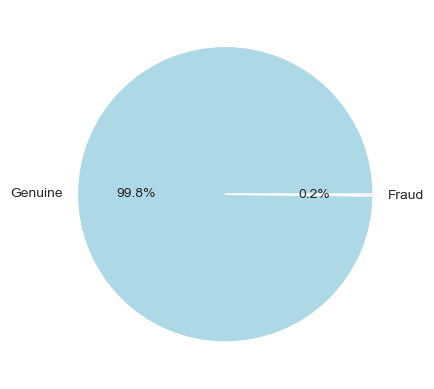

In [36]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['lightblue','red'])
plt.ylabel('')
plt.show()

Time variable
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, dtype: float64
Time variable to show the change of Time in seconds to Time in hours


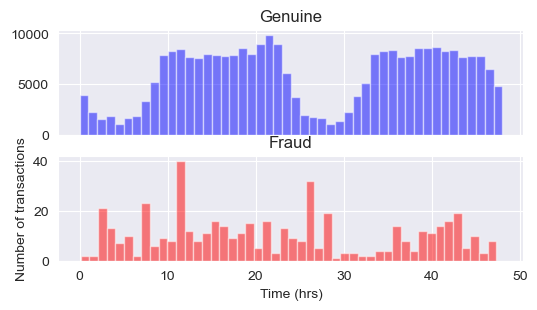

In [58]:
# Time vs Number of Transactions in Class = 0 and Class = 1 transactions
print("Time variable")
df["Time_Hr"] = df["Time"]/3600 # convert to hours
print(df["Time_Hr"].tail(5))
print("Time variable to show the change of Time in seconds to Time in hours")
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='blue',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('Number of transactions')
plt.show()

This graph presents the following information:
- The "Time" attribute indicates an increase in transaction frequency during the daytime. However, the volume of transactions exhibits a comparable time-of-day dependency for both categories. Consequently, I infer that this attribute lacks significant predictive capability for differentiating between the two classes. Nonetheless, I plan to validate this hypothesis later. 

In [59]:
# Removing "Time" column (axis = 1) because Time based on the hour is stronger data interpretation value
df = df.drop(['Time'],axis=1)

In [55]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hr
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,47.996111
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,47.996389
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,47.996667
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,47.996667
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,47.997778


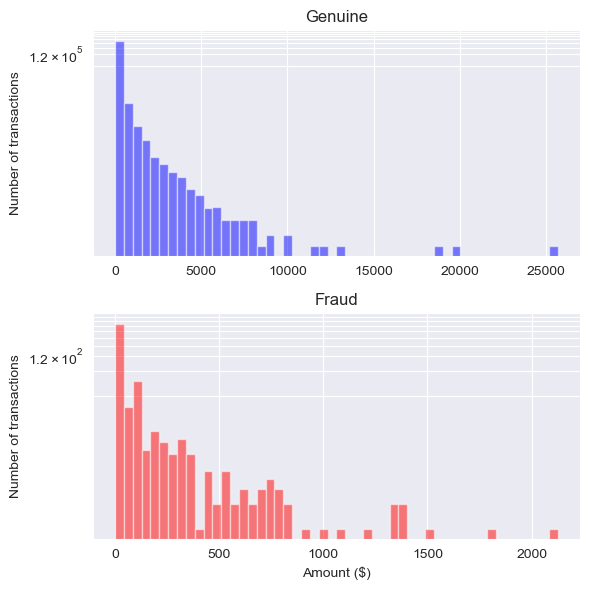

In [52]:
import matplotlib

fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,6)) 
ax3.hist(df.Amount[df.Class==0],bins=50,color='blue',alpha=0.5)
ax3.set_yscale('log') 
ax3.set_title('Genuine') 
ax3.set_ylabel('Number of transactions')
ax3.get_yaxis().set_major_locator(matplotlib.ticker.MaxNLocator(nbins=10))  # Reduce y-tick frequency

ax4.hist(df.Amount[df.Class==1],bins=50,color='red',alpha=0.5)
ax4.set_yscale('log')
ax4.set_title('Fraud') 
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('Number of transactions')
ax4.get_yaxis().set_major_locator(matplotlib.ticker.MaxNLocator(nbins=10))  # Reduce y-tick frequency

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Transaction amounts over 10k are only in the Genuine Class.

In [60]:
# The scale of the 'Amount' feature differs from that of the principal components. Therefore, I will standardize the 'Amount' values using the StandardScaler and store them in the data frame for future reference.

from sklearn.preprocessing import StandardScaler

df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)

In [61]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_Hr,scaled_Amount
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,47.996111,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,47.996389,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,47.996667,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,47.996667,-0.313249
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0,47.997778,0.514355


/var/folders/gw/m7333wt957q0gz8nbqnf596h0000gn/T/ipykernel_27514/2687892790.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col][df.Class == 1], bins=50, color='red')
/var/folders/gw/m7333wt957q0gz8nbqnf596h0000gn/T/ipykernel_27514/2687892790.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

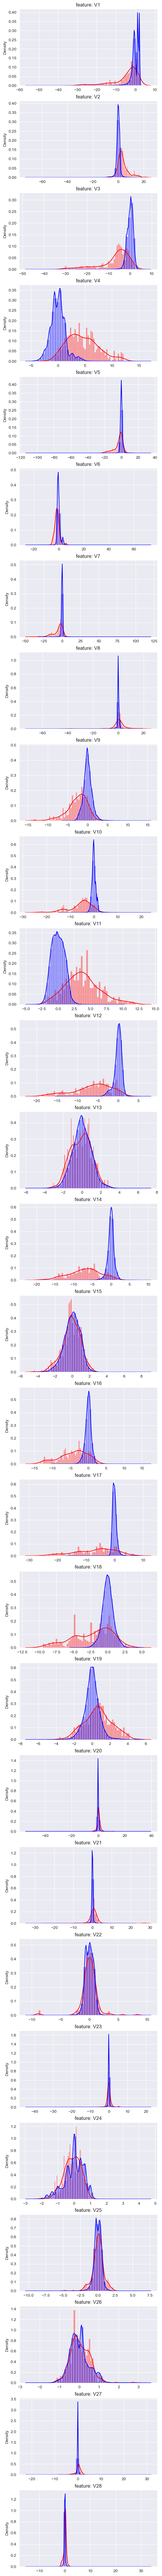

In [63]:
# Understanding the correlation and shape between the principal components (V1-V28) obtained with PCA (Principal Component Analysis)
# Finding out whether the Genuine and Fraud transactions overlap

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='red')
    sns.distplot(df[col][df.Class == 0], bins=50, color='blue')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

According to this distribution plot, it shows that a lot of the times, the Genuine and Fraud transactions overlap as both classes have similar distribution. This means that this data analysis have no significant contribution.

Splitting the data in test set (30%) and training set (70%)

In [65]:
def split_data(df, drop_list):
    df = df.drop(drop_list,axis=1)
    print(df.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = df['Class'].values #target
    X = df.drop(['Class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

Splitting the data into training and testing sets is crucial in the process of machine learning model building. 

This process is needed so we can **evaluate performance**, **avoid overfitting**, **model tuning** and for a **fair evaluation**. 

The function below is designed to define a classifier and obtain predictions. It utilizes the "predict()" method to determine whether a record belongs to the "Fraud" or "Genuine" class. Additionally, there's the "predict_proba()" method, which provides the probabilities for each class. This method is particularly useful for understanding how modifying the threshold for classifying an instance as class 1 or 0 can affect precision and recall scores. This approach will be instrumental in calculating the area under the Receiver Operating Characteristic (ROC) curve.

In [74]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

predict(): 
This method is employed once a model has been trained using a training data set. It requires an array-like input, typically a 2D array where each sub-array represents a feature set corresponding to a data instance. The method then returns an array containing the predicted classes for each instance. In a binary classification problem, these predictions are usually denoted as 0 or 1, representing the respective classes, such as "Fraud" or "Genuine."

predict_proba(): 
This method yields the probabilities for each class, rather than the class labels themselves. In a binary classification context, such as distinguishing between "Fraud" and "Genuine," it returns a pair of probabilities for each instance. These probabilities, which always sum to 1, represent the likelihood of the instance belonging to the negative class (0) and the positive class (1), respectively. This provides insight into the model's "confidence" in its predictions. If the probabilities are near 0 or 1, it indicates a high level of confidence by the model in its prediction. Conversely, if the probabilities are similar in value, it suggests that the model is uncertain about its prediction.

Function to print the classifier's scores

In [80]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    # confusion matrix to evaluate model performance shows the numbers of true positives, true negatives, false positives and false negatives
    print("recall score: ", recall_score(y_test,y_pred))
    # recall score (aka. true positive rate or sensitivity) to show the ratio of true positive predictions to the total number of actual positives
    print("precision score: ", precision_score(y_test,y_pred))
    # precision score (aka. positive predictive value) presents the ratio of true positive predictions to the total number of positive predictions made by the model (which includes both true positives and false positives)
    print("f1 score: ", f1_score(y_test,y_pred))
    # F1 score shows the harmonic mean of precision and recall. It takes both false positives and false negatives into account, and it is often used when the class distribution is imbalanced. 
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    # Accuracy score presents the proportion of correct predictions (both true positives and true negatives) in total predictions made by the model
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))
    # ROC AUC (Receiver Operating Characteristic Area Under the Curve) presents a performance measurement for the classification problems at various threshold settings. In this code, it returns the ROC AUC score for the positive class. 

In summary, these functions are essential for calculating a range of key statistics and measures to assess a classifier's effectiveness. They are particularly valuable when used in tandem, as they offer diverse perspectives on a model's performance. This is especially important in scenarios with imbalanced data or when different types of errors carry varying levels of consequence.

Within this framework, the 'print_scores' function provides a thorough evaluation of a classifier. It outputs crucial metrics such as the confusion matrix, recall, precision, F1 score, accuracy, and the ROC AUC (Receiver Operating Characteristic Area Under the Curve) of the predictions.

By examining these scores, you can gain a more nuanced understanding of where your model excels and where it falls short. This insight is crucial for refining your model, determining its readiness for practical application, and making more informed decisions about using it for real-world predictions.

As mentioned earlier, certain features display comparable patterns for both transaction types. Therefore, I propose that eliminating these features could decrease the complexity of the model, potentially enhancing its sensitivity. To verify this theory, we can proceed by omitting some of these features and then reassessing the model's performance through its scores.

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [77]:
# Case-NB-1 : do not drop anything
drop_list = []
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Time_Hr',
       'scaled_Amount'],
      dtype='object')
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
train-set confusion matrix:
 [[194741   4279]
 [    55    289]]
test-set confusion matrix:
 [[83445  1850]
 [   29   119]]
recall score:  0.8040540540540541
precision score:  0.06043676993397664
f1 score:  0.11242324043457724
accuracy score:  0.9780087309668434
ROC AUC: 0.9552264557188643


In [78]:
# Case-NB-2 : drop some of principle components that have similar distributions in above plots 
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'Time_Hr',
       'scaled_Amount'],
      dtype='object')
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
train-set confusion matrix:
 [[196030   2990]
 [    47    297]]
test-set confusion matrix:
 [[84004  1291]
 [   26   122]]
recall score:  0.8243243243243243
precision score:  0.08634111818825195
f1 score:  0.15631005765534917
accuracy score:  0.9845862153716513
ROC AUC: 0.9563441189005407


Removing some of the reduntant principle components increased model sensitivity and precision, making it more adept at distinguishing between the different classes.

In [79]:
# Case-NB-3 : drop some of principle components + Time 
drop_list = ['Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'scaled_Amount'],
      dtype='object')
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
train-set confusion matrix:
 [[196031   2989]
 [    47    297]]
test-set confusion matrix:
 [[84000  1295]
 [   26   122]]
recall score:  0.8243243243243243
precision score:  0.08609738884968243
f1 score:  0.15591054313099043
accuracy score:  0.9845394005360298
ROC AUC: 0.9562819340825086


'Time_Hr' has no effect on the scores (Comparing Case-NB-2 and Case-NB-3). Therefore, removing 'Time_Hr' will not impact the classification process.

In [81]:
# Case-NB-4 : drop some of principle components + Time + 'scaled_Amount'
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
train-set confusion matrix:
 [[196060   2960]
 [    47    297]]
test-set confusion matrix:
 [[84012  1283]
 [   26   122]]
recall score:  0.8243243243243243
precision score:  0.08683274021352314
f1 score:  0.1571152607855763
accuracy score:  0.9846798450428941
ROC AUC: 0.9555904151410921


Comparing Case-NB-4 (dropped redundant features) and Case-NB-1 (0 principal components dropped), the model sensitivity is much better as the scores (specifically the 'recall score') are higher. Therefore, we can safely remove the 'drop_list' from the DataFrame to make calculations fast and gain higher sensitivity.  

In [82]:
df = df.drop(drop_list,axis=1)
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')


Comparing Gaussian Naive Bayes (GaussianNB) and Logistic Regression is common in machine learning, particularly for classification tasks. 

Reasons: 
1. **Algorithmic Differences:** GaussianNB and Logistic Regression are fundamentally different in how they approach classification problems. GaussianNB is based on applying Bayes' theorem with the assumption of normal distribution of features, while Logistic Regression is a linear model for binary classification that predicts the probability of a binary outcome based on input features.

2. **Performance in Different Conditions:** These models may perform differently depending on the nature of the data. GaussianNB often performs well with smaller datasets and can handle irrelevant features better. Logistic Regression, on the other hand, can perform better when relationships in the data are linear and can provide more interpretable results.

3. **Handling of Data Distribution:** GaussianNB assumes that features follow a normal distribution, which may not always be the case in real-world data. Logistic Regression does not make such strong assumptions about the distribution of features, which can make it more robust in certain situations.

4. **Speed and Scalability:** GaussianNB is generally faster and requires less computational resources, making it suitable for very large datasets or for situations where speed is crucial. Logistic Regression can be more computationally intensive, especially with large numbers of features.

5. **Interpretability:** Logistic Regression models are often more interpretable than GaussianNB models. The coefficients in a Logistic Regression model can provide insights into the importance and impact of different features on the prediction, which can be valuable in many applications.

6. **Probabilistic Understanding:** Both models provide probabilities as outputs, but they compute these probabilities differently. Comparing the two can give insights into how sensitive each model is to the underlying data distribution.

7. **Performance Metrics:** By comparing the models on various performance metrics (like accuracy, precision, recall, F1 score, ROC-AUC), you can understand which model is more suited to your specific problem, especially in cases of imbalanced datasets.

8. **Domain-Specific Applications:** Depending on the specific domain or type of data (e.g., text data, medical data), one model might be traditionally preferred over the other, and comparing them can challenge or confirm these conventions.

Our aim is to compare the performance between the recall scores of GaussianNB() and the recall score of the logistic regressor for test dataset (which is 30% of full dataset, selected above)

In [87]:
# let us check recall score for logistic regression
# Case-LR-1
drop_list=[]
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear'), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
train-set confusion matrix:
 [[198993     27]
 [   146    198]]
test-set confusion matrix:
 [[85280    15]
 [   68    80]]
recall score:  0.5405405405405406
precision score:  0.8421052631578947
f1 score:  0.6584362139917695
accuracy score:  0.9990285921608558
ROC AUC: 0.9600671279169433


The recall score is very low which indicates that the model misses a significant number of positive instances. A low recall score means that many actual positives are not being correctly identified by the model. In this instance, a low recall would mean that many fraudulent transactions are not being detected.

A low recall often suggests a need to improve the model’s ability to detect positive cases, which might involve acquiring more representative training data, feature engineering, or choosing a different model. Therefore, we will train it in a different way (i.e. from under-sampled data). So, take only that percent of genuine-class cases which is equal to all fraud-classes (i.e. consider 50/50 ratio of both classes) 

In [94]:
# get indices for fraud and genuine classes 
fraud_ind = df[df.Class == 1].index
gen_ind = df[df.Class == 0].index

# Convert to series and random selection from genuine class
gen_ind_series = pd.Series(gen_ind)
random_gen_ind = gen_ind_series.sample(n=len(fraud_ind), replace=False)

# Combine fraud indices with random genuine indices
under_sample_ind = pd.concat([pd.Series(fraud_ind), random_gen_ind])

# Get the undersampled DataFrame
undersample_df = df.loc[under_sample_ind]

# Set target variable y and feature set X
y_undersample = undersample_df['Class']
X_undersample = undersample_df.drop(['Class'], axis=1)

# Print information
print("Number of transactions in undersampled data: ", len(undersample_df))
print("Percentage (%) of  genuine transactions: ", len(undersample_df[undersample_df.Class == 0])/len(undersample_df))
print("Percentage (%) of fraud transactions: ", len(undersample_df[undersample_df.Class == 1])/len(undersample_df))

Number of transactions in undersampled data:  984
Percentage (%) of  genuine transactions:  0.5
Percentage (%) of fraud transactions:  0.5


In [96]:
# let us train logistic regression with undersamples data
# Case-LR-2
# split undersampled data into 70/30 train-test datasets. 
# - Train model from this 70% fraction of undersampled data, get predictions from left over i.e. 30%.
drop_list = []
X_und_train, X_und_test, y_und_train, y_und_test = split_data(undersample_df, drop_list)
y_und_pred, y_und_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear'), X_und_train, y_und_train, X_und_test)
print_scores(y_und_test,y_und_pred,y_und_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  688 
test-set size:  296
fraud cases in test-set:  148
train-set confusion matrix:
 [[306  38]
 [ 24 320]]
test-set confusion matrix:
 [[134  14]
 [  8 140]]
recall score:  0.9459459459459459
precision score:  0.9090909090909091
f1 score:  0.9271523178807948
accuracy score:  0.9256756756756757
ROC AUC: 0.9737034331628927


After using the undersampled data, we can see that the sensitivity of this model has improved drastically from 54% to 95%. 

To understand this dataset better, we can check its performance for the full skewed dataset. FYI: 'train' from undersampled data, and 'test' on full data.

In [98]:
# Case-LR-3
# "train" with undersamples, "test" with full data
# call classifier
lr = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
# fit it to complete undersampled data
lr.fit(X_undersample, y_undersample)
# predict on full data
y_full = df['Class'].values #target
X_full = df.drop(['Class'],axis=1).values #features
y_full_pred = lr.predict(X_full)
# Compute predicted probabilities: y_pred_prob
y_full_pred_prob = lr.predict_proba(X_full)
print("scores for Full set")   
print('test-set confusion matrix:\n', confusion_matrix(y_full,y_full_pred)) 
print("recall score: ", recall_score(y_full,y_full_pred))
print("precision score: ", precision_score(y_full,y_full_pred))

/Users/derek/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/derek/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


scores for Full set
test-set confusion matrix:
 [[274405   9910]
 [    44    448]]
recall score:  0.9105691056910569
precision score:  0.04325159297161614


We can see from this that training using undersampled data while testing with the full dataset increases the model sensitivity. The model sensitivity with this training test is 91%. While the model sensitivity through training with the original dataset is 54%.

Comparing the scores from GaussianNB with logistic-regression

In [100]:
# Case-LR-4
y_p30_pred = lr.predict(X_test)
y_p30_pred_prob = lr.predict_proba(X_test)
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_p30_pred)) 
print("recall score: ", recall_score(y_test,y_p30_pred))
print("precision score: ", precision_score(y_test,y_p30_pred))

test-set confusion matrix:
 [[82353  2942]
 [   20   128]]
recall score:  0.8648648648648649
precision score:  0.04169381107491857


/Users/derek/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/derek/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Comparing the NB and LR recall scores: NB = 0.83 (83%), LR = 0.91 (91%). 

This means that the model sensitivity is better through logistic-regression classification compared to GaussianNB. However, the precision score of NB (8%) is almost double from that of LR (4%) which indicates that NB classification model has a higher percentage of correct positive predictions. In other words, out of all the transactions that are predicted as Fraud, NB classification model has double the percentage where the model are indeed Fraud. 